## Pelatihan Dataset
**Import Library**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.0 MB/s eta 0:00:00


**Loading Dataset**

In [3]:
df = pd.read_csv('theotown_reviews.csv')

In [4]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you...",2026-02-06 13:10:22,1.12.50a
1,6e0a678d-51a1-430e-a204-a6aa13a1abd9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus gamenya bisa buat gedung DPR bagus bange...,3,0,NaN,2026-02-06 11:10:11,Hi Ranjani! 😊 I'm glad you enjoy creating with...,2026-02-06 13:00:25,NaN
2,5c3e01e4-70f2-4c3b-8755-20214906ff42,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Collab sama game atau anime lain dong biar ser...,5,0,NaN,2026-02-06 11:05:34,Hi Londo! 😊 Thanks for your 5-star review! We'...,2026-02-06 12:20:27,NaN
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy T...",2026-02-06 12:30:24,1.12.50a
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrille...",2026-02-06 13:20:17,1.12.50a


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  11879 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          9035 non-null   object
 9   repliedAt             9035 non-null   object
 10  appVersion            11879 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [6]:
# drop baris yang memiliki nilai nan dari dataset
clean_df = df.dropna()

In [7]:
# drop baris duplikat dari clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_review_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7181 entries, 0 to 14994
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              7181 non-null   object
 1   userName              7181 non-null   object
 2   userImage             7181 non-null   object
 3   content               7181 non-null   object
 4   score                 7181 non-null   int64 
 5   thumbsUpCount         7181 non-null   int64 
 6   reviewCreatedVersion  7181 non-null   object
 7   at                    7181 non-null   object
 8   replyContent          7181 non-null   object
 9   repliedAt             7181 non-null   object
 10  appVersion            7181 non-null   object
dtypes: int64(2), object(9)
memory usage: 673.2+ KB


**Preprocessing**

In [9]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
import json

with open("slangwords.json", "r", encoding = 'utf-8') as file:
  slangwords = json.load(file)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you...",2026-02-06 13:10:22,1.12.50a
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy T...",2026-02-06 12:30:24,1.12.50a
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrille...",2026-02-06 13:20:17,1.12.50a
6,73b5a2c2-45b0-40ad-b74a-3491cbf8725f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gamenya bagus sih,5,0,1.12.50a,2026-02-06 10:52:31,Hi Very Azis! 🌟 Thank you so much for your kin...,2026-02-06 12:10:12,1.12.50a
8,2eac1e7b-8923-4198-9d11-3eda299506b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seru banget asli,5,0,1.12.50a,2026-02-06 10:48:37,"Thank you so much, Faudzan! 😊 We're thrilled t...",2026-02-06 13:20:20,1.12.50a
...,...,...,...,...,...,...,...,...,...,...,...
14980,2f7ba804-086e-4baf-bf1b-92120301e70d,Hamid,https://play-lh.googleusercontent.com/a-/ALV-U...,geme nya bagus sekali,5,0,1.12.42a,2026-01-18 05:25:26,Hi Hamid! 🌟 Thank you for your kind words! We'...,2026-01-18 05:50:18,1.12.42a
14982,97e2cbb1-5335-47a4-99b1-395c6ced2a76,taju taju,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat keren,5,0,1.12.42a,2026-01-18 05:24:15,"Thank you, Taju! 🌟 We're thrilled you find The...",2026-01-18 05:30:14,1.12.42a
14984,9801dced-30e7-47a2-b042-945bf9e5f8ae,—LexxLuthor.,https://play-lh.googleusercontent.com/a/ACg8oc...,SERU ABIEZ,5,0,1.12.42a,2026-01-18 05:23:59,Hi Sjjsje! 🌟 We're thrilled to hear you're exc...,2026-01-18 05:30:17,1.12.42a
14986,00087e9d-2d8d-4a56-9520-4d57d5aa4f4a,Narendra Azkarevy,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat bagus asik di mainan dan memberi kebeba...,5,0,1.12.42a,2026-01-18 05:23:40,Hi Narendra! 😊 Thank you for your wonderful re...,2026-01-18 05:50:20,1.12.42a


In [12]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [14]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you...",2026-02-06 13:10:22,1.12.50a,i like,i like,i like,"[i, like]",[like],like
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy T...",2026-02-06 12:30:24,1.12.50a,game ini sangat bagus,game ini sangat bagus,game ini sangat bagus,"[game, ini, sangat, bagus]","[game, bagus]",game bagus
4,41121767-1d81-420e-b382-baae5758eea7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,1.12.50a,2026-02-06 11:02:19,"Thank you so much, Jeffblocks! 😊 We're thrille...",2026-02-06 13:20:17,1.12.50a,bagus,bagus,bagus,[bagus],[bagus],bagus
6,73b5a2c2-45b0-40ad-b74a-3491cbf8725f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gamenya bagus sih,5,0,1.12.50a,2026-02-06 10:52:31,Hi Very Azis! 🌟 Thank you so much for your kin...,2026-02-06 12:10:12,1.12.50a,gamenya bagus sih,gamenya bagus sih,gamenya bagus sih,"[gamenya, bagus, sih]","[gamenya, bagus]",gamenya bagus
8,2eac1e7b-8923-4198-9d11-3eda299506b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,seru banget asli,5,0,1.12.50a,2026-02-06 10:48:37,"Thank you so much, Faudzan! 😊 We're thrilled t...",2026-02-06 13:20:20,1.12.50a,seru banget asli,seru banget asli,seru banget asli,"[seru, banget, asli]","[seru, banget, asli]",seru banget asli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14980,2f7ba804-086e-4baf-bf1b-92120301e70d,Hamid,https://play-lh.googleusercontent.com/a-/ALV-U...,geme nya bagus sekali,5,0,1.12.42a,2026-01-18 05:25:26,Hi Hamid! 🌟 Thank you for your kind words! We'...,2026-01-18 05:50:18,1.12.42a,geme nya bagus sekali,geme nya bagus sekali,geme nya bagus sekali,"[geme, nya, bagus, sekali]","[geme, bagus]",geme bagus
14982,97e2cbb1-5335-47a4-99b1-395c6ced2a76,taju taju,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat keren,5,0,1.12.42a,2026-01-18 05:24:15,"Thank you, Taju! 🌟 We're thrilled you find The...",2026-01-18 05:30:14,1.12.42a,sangat keren,sangat keren,sangat keren,"[sangat, keren]",[keren],keren
14984,9801dced-30e7-47a2-b042-945bf9e5f8ae,—LexxLuthor.,https://play-lh.googleusercontent.com/a/ACg8oc...,SERU ABIEZ,5,0,1.12.42a,2026-01-18 05:23:59,Hi Sjjsje! 🌟 We're thrilled to hear you're exc...,2026-01-18 05:30:17,1.12.42a,SERU ABIEZ,seru abiez,seru abiez,"[seru, abiez]","[seru, abiez]",seru abiez
14986,00087e9d-2d8d-4a56-9520-4d57d5aa4f4a,Narendra Azkarevy,https://play-lh.googleusercontent.com/a/ACg8oc...,Sangat bagus asik di mainan dan memberi kebeba...,5,0,1.12.42a,2026-01-18 05:23:40,Hi Narendra! 😊 Thank you for your wonderful re...,2026-01-18 05:50:20,1.12.42a,Sangat bagus asik di mainan dan memberi kebeba...,sangat bagus asik di mainan dan memberi kebeba...,sangat bagus asik di mainan dan memberi kebeba...,"[sangat, bagus, asik, di, mainan, dan, memberi...","[bagus, asik, mainan, kebebasan, suka, game, b...",bagus asik mainan kebebasan suka game bertema ...


**label**

In [15]:
# Labeling dengan lexicon
import csv
import requests
from io import StringIO

# Positive
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')


if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Negative
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [16]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
      polarity = 'neutral'

    return score, polarity

In [18]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    2952
negative    2346
neutral     1883
Name: count, dtype: int64


**Visualisasi Data**

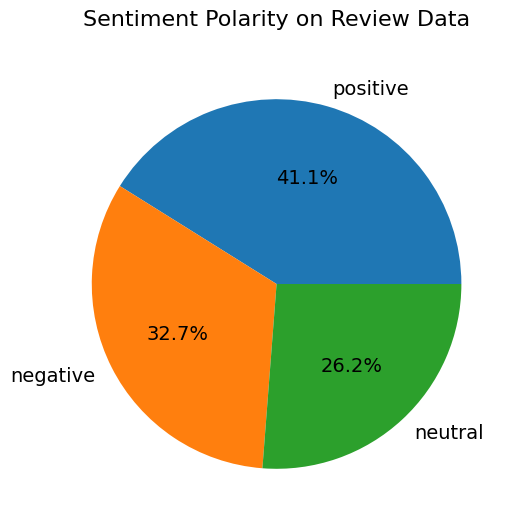

In [19]:
# Pie Chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [20]:
def word_reviews(df):
    pd.set_option('display.max_colwidth', 10000)
    reviews = {}

    for label in df['polarity'].unique():
        temp_df = df[df['polarity'] == label]
        temp_df = temp_df[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
        temp_df = temp_df.sort_values(by='polarity_score', ascending=False)
        temp_df = temp_df.reset_index(drop=True)
        temp_df.index += 1

        reviews[label] = temp_df

    return reviews

def make_wordcloud(df, title):
  list_words = ''
  for tweet in df['text_stopword']:
      for word in tweet:
          list_words += ' ' + (word)

  wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.set_title(title, fontsize=18)
  ax.grid(False)
  ax.imshow((wordcloud))
  fig.tight_layout(pad=0)
  ax.axis('off')
  plt.show()

In [21]:
reviews = word_reviews(clean_df)
positive_reviews = reviews['positive']
negative_reviews = reviews['negative']
neutral_reviews = reviews['neutral']

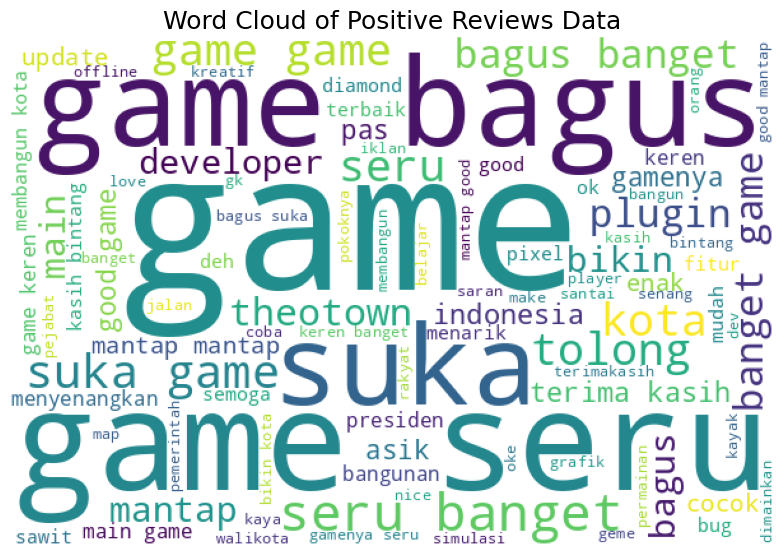

In [22]:
make_wordcloud(positive_reviews, title="Word Cloud of Positive Reviews Data")


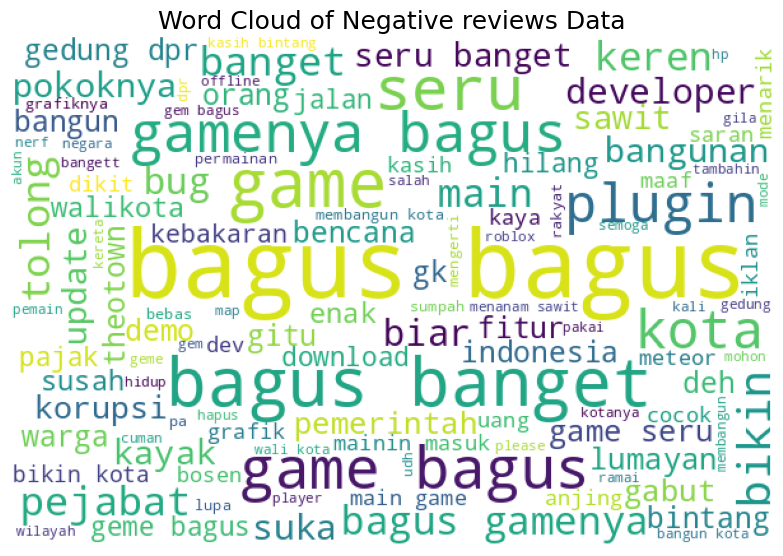

In [23]:
make_wordcloud(negative_reviews, title="Word Cloud of Negative reviews Data")

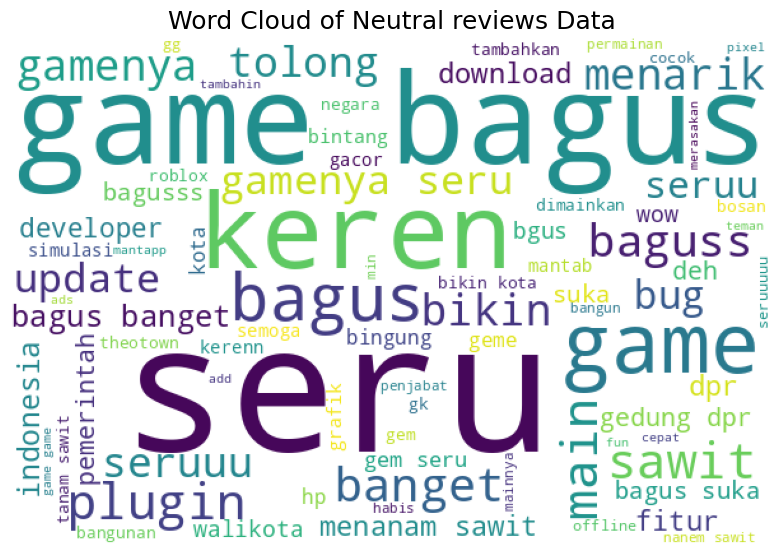

In [24]:
make_wordcloud(neutral_reviews, title="Word Cloud of Neutral reviews Data")

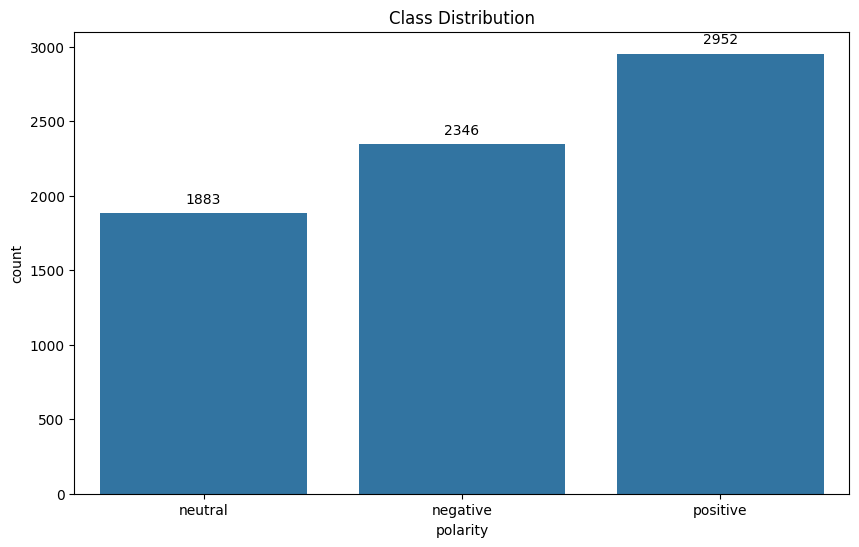

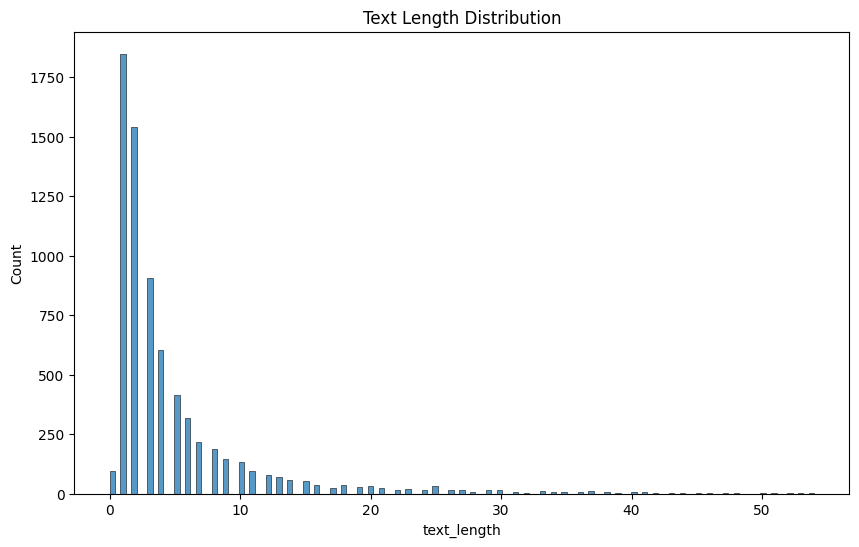

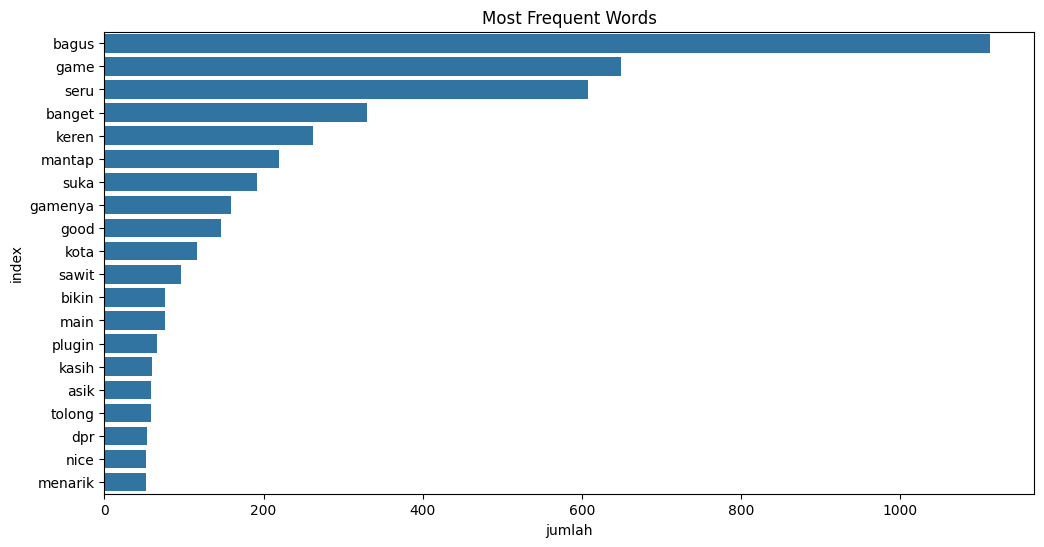

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

**Data Splitting**

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [27]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,935e5941-f9cd-4a97-bea5-565c18613819,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,i like,5,0,1.12.50a,2026-02-06 11:11:11,"Thank you so much, Rifky! 😊 We're thrilled you like TheoTown! Your support means the world to us. If you have any suggestions or feedback, feel free to let us know. Happy building! 🏙️\n\nChloe 🌟",2026-02-06 13:10:22,1.12.50a,i like,i like,i like,"[i, like]",[like],like,0,neutral,1
3,37e9f3b4-2048-4790-a410-ccdd83c6921f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,game ini sangat bagus😅😄,5,0,1.12.50a,2026-02-06 11:04:00,"Thank you, Bagas! 😊 We're thrilled you enjoy TheoTown. Your support means the world to us. If you have any suggestions or feedback, feel free to share. Happy building! 🏙️\n\nAva",2026-02-06 12:30:24,1.12.50a,game ini sangat bagus,game ini sangat bagus,game ini sangat bagus,"[game, ini, sangat, bagus]","[game, bagus]",game bagus,0,neutral,2


In [28]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

**TFID**

In [29]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [30]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [31]:
# Menampilkan hasil ekstraksi fitur
features_df

,add,air,akun,anak,anjing,asik,bagus,baguss,bagusss,bang,...,udh,update,versi,viral,wali,walikota,warga,wilayah,wow,yah
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.699539,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.472180,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,0.0,0.0,0.0,0.0,0.0,0.000000,0.355354,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7177,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7178,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7179,0.0,0.0,0.0,0.0,0.0,0.334224,0.131300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Balancing Data menggunakan Teknik Oversampling SMOTE**

In [32]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_tfidf, y)

In [34]:
print(Counter(y_res))

Counter({'neutral': 2952, 'negative': 2952, 'positive': 2952})


**Random Forest dengan ekstrasi fitur TFID, 70/30**

In [35]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.964187772221326
Random Forest - accuracy_test: 0.8803161460293564


**BoW**

In [37]:
# Ekstrasi Fitur Bag Of Word (BOW)
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
# Bag of Words
bow = CountVectorizer(
    max_features=2000,
    min_df=5,
    max_df=0.8
)

In [39]:
X_bow = bow.fit_transform(X)

In [40]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_bow, y)

In [41]:
print(Counter(y_res))

Counter({'neutral': 2952, 'negative': 2952, 'positive': 2952})


**Random Forest dengan ekstrasi fitur BoW, 80/20**

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.20, random_state=42
)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest bow - accuracy_train:', accuracy_train_rf_bow)
print('Random Forest bow - accuracy_test:', accuracy_test_rf_bow)

Random Forest bow - accuracy_train: 0.978119706380576
Random Forest bow - accuracy_test: 0.868510158013544


**Logistic Regression dengan ekstrasi fitur BoW, 75/25**

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42
)

In [45]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9212586570310147
Logistic Regression - accuracy_test: 0.8807588075880759


**Deep Learning LSTM 80/20**

In [46]:
!pip install Tokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 9.9 MB/s eta 0:00:00


In [47]:
# Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(clean_df['text_akhir'])

sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


# Converting labels to numerical format
le = LabelEncoder()
y = le.fit_transform(clean_df['polarity'])
y = to_categorical(y, num_classes=3)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=200,
        input_length=MAX_SEQUENCE_LENGTH
    ),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas sentimen
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train_int = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),
    y=y_train_int
)

class_weight_dict = dict(enumerate(class_weights))

In [51]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.5279 - loss: 0.9243 - val_accuracy: 0.8594 - val_loss: 0.3941
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8994 - loss: 0.3009 - val_accuracy: 0.8914 - val_loss: 0.3070
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9474 - loss: 0.1518 - val_accuracy: 0.8796 - val_loss: 0.3875
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9748 - loss: 0.0769 - val_accuracy: 0.8796 - val_loss: 0.4124
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9798 - loss: 0.0586 - val_accuracy: 0.8942 - val_loss: 0.4232


In [53]:
# Evaluasiii
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, F1 score
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val_argmax = np.argmax(y_val, axis=1)

print('Precision:', precision_score(y_val_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_val_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_val_argmax, y_pred, average='weighted'))

# Evaluasi akurasi model LSTM pada data pelatihan
lstm_loss, lstm_accuracy_test = model.evaluate(X_val, y_val, verbose=0)

# Evaluasi akurasi model LSTM pada data
lstm_accuracy_train = history.history['accuracy'][-1]

# Menampilkan akurasi
print('LSTM - accuracy_train:', lstm_accuracy_train)
print('LSTM - accuracy_test:', lstm_accuracy_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Precision: 0.8913910801157487
Recall: 0.8914405010438413
F1 score: 0.8914035589255788
LSTM - accuracy_train: 0.9799790978431702
LSTM - accuracy_test: 0.8914405107498169


**Inferensi**

In [54]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Random Forest TFID 70/30', 'Random Forest BoW 80/20', 'Logistic Regression BoW 75/25', 'LSTM 80/20'],
    'Accuracy Train': [accuracy_train_rf, accuracy_train_rf_bow, accuracy_train_lr, lstm_accuracy_train],
    'Accuracy Test': [accuracy_test_rf, accuracy_test_rf_bow, accuracy_test_lr, lstm_accuracy_test]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                           Model  Accuracy Test
0       Random Forest TFID 70/30       0.880316
1        Random Forest BoW 80/20       0.868510
2  Logistic Regression BoW 75/25       0.880759
3                     LSTM 80/20       0.891441


In [55]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                           Model  Accuracy Test
3                     LSTM 80/20       0.891441
2  Logistic Regression BoW 75/25       0.880759
0       Random Forest TFID 70/30       0.880316
1        Random Forest BoW 80/20       0.868510


Dalam kasus Sentiment Analysis ini, algoritma LSTM mencapai akurasi tertinggi sebesar 89%. Oleh karena itu, algoritma LSTM dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [60]:
kalimat_baru = [
    "Game ini seru banget dan bikin nagih",
    "Game-nya bikin pusing",
    "Grafiknya jelek"
]

In [57]:
def inferensi(kalimat):
  if isinstance(kalimat, str):
        kalimat = [kalimat]

  sequences = tokenizer.texts_to_sequences(kalimat)
  padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

  pred = model.predict(padded)
  pred_class = np.argmax(pred, axis=1)

  pred_label = le.inverse_transform(pred_class)

  for text, label in zip(kalimat, pred_label):
      print(f"Teks: {text}")
      print(f"Prediksi Sentimen: {label}")
      print("-" * 40)

In [61]:
inferensi(kalimat_baru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Teks: Game ini seru banget dan bikin nagih
Prediksi Sentimen: positive
----------------------------------------
Teks: Game-nya bikin pusing
Prediksi Sentimen: neutral
----------------------------------------
Teks: Grafiknya jelek
Prediksi Sentimen: negative
----------------------------------------
